<a href="https://colab.research.google.com/github/ElakiyaGovindarajan/Game-Classification-and-prediction/blob/main/GamePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil

In [34]:
df = pd.read_csv('videogamedataset.csv', encoding="utf-8")
dfa = df
dfa = dfa.copy()
df[70:78]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
70,Call of Duty 4: Modern Warfare,X360,2007.0,Shooter,Activision,5.93,2.36,0.13,0.90,9.31,94.0,70.0,8.4,1320.0,Infinity Ward,M
71,Donkey Kong Country,SNES,1994.0,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30,NaN,NaN,NaN,NaN,NaN,NaN
72,Minecraft,X360,2013.0,Misc,Microsoft Game Studios,5.70,2.65,0.02,0.81,9.18,NaN,NaN,NaN,NaN,NaN,NaN
73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.03,2.36,4.39,0.39,9.16,88.0,70.0,8.7,626.0,Nintendo,E
74,Mario Party DS,DS,2007.0,Misc,Nintendo,4.40,1.85,1.98,0.68,8.91,72.0,27.0,7.8,85.0,Hudson Soft,E
75,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.05,2.79,0.10,0.85,8.79,96.0,89.0,8.4,3589.0,Bethesda Game Studios,M
76,Super Mario Kart,SNES,1992.0,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76,NaN,NaN,NaN,NaN,NaN,NaN
77,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E


<ipython-input-40-651de651bd68>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
<ipython-input-40-651de651bd68>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
<ipython-input-40-651de651bd68>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and s

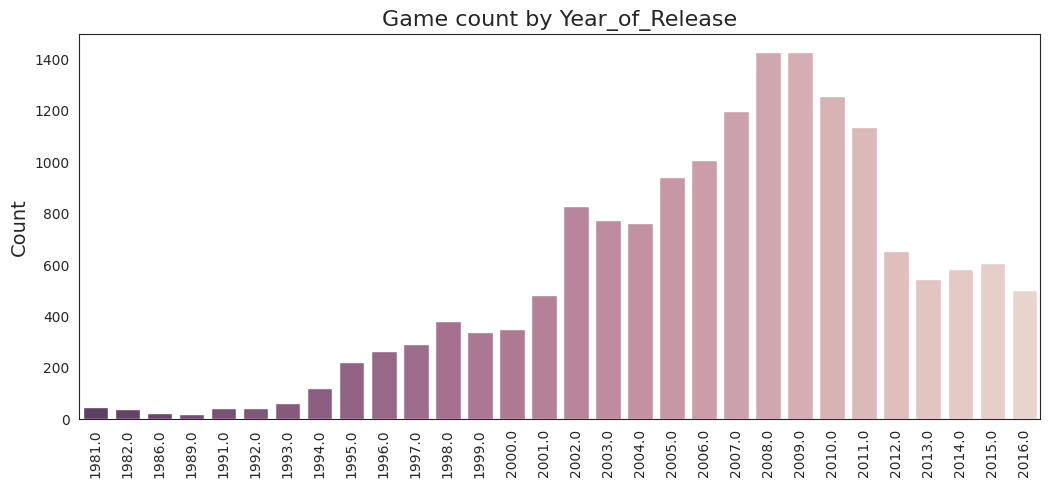

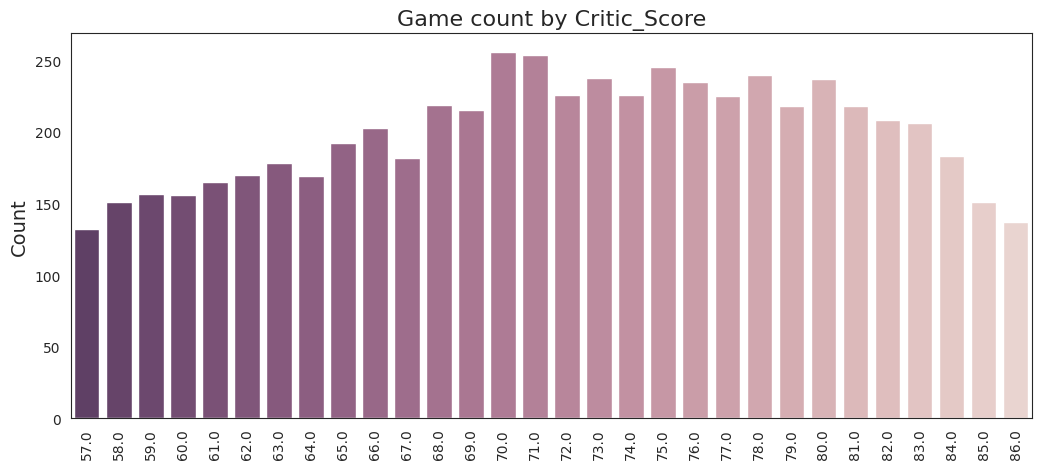

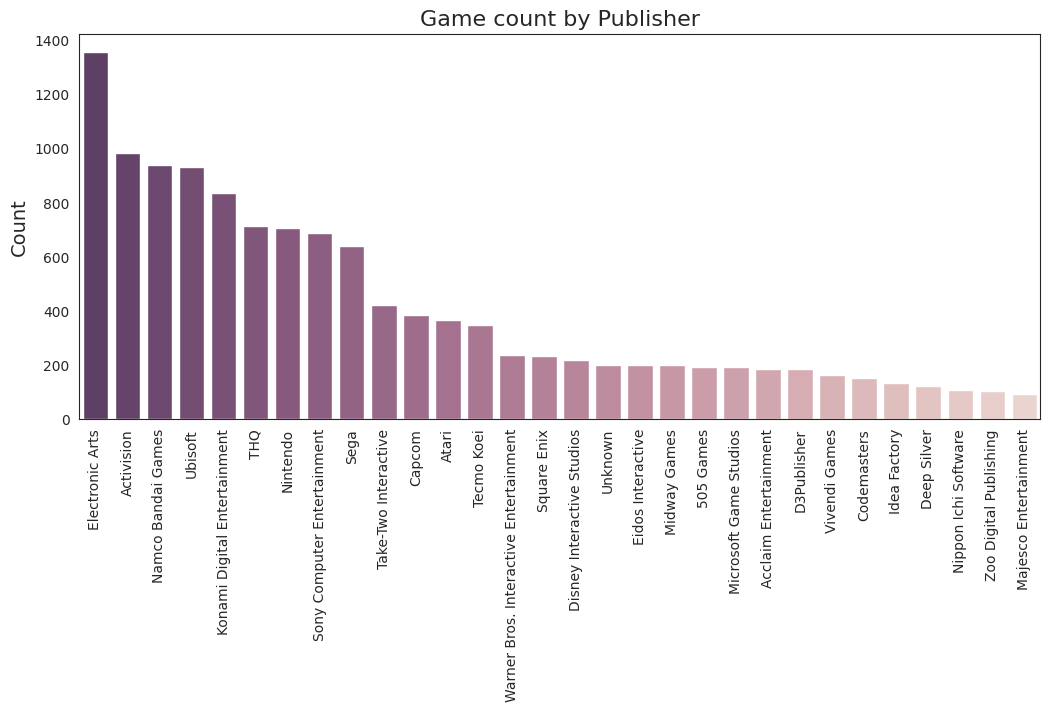

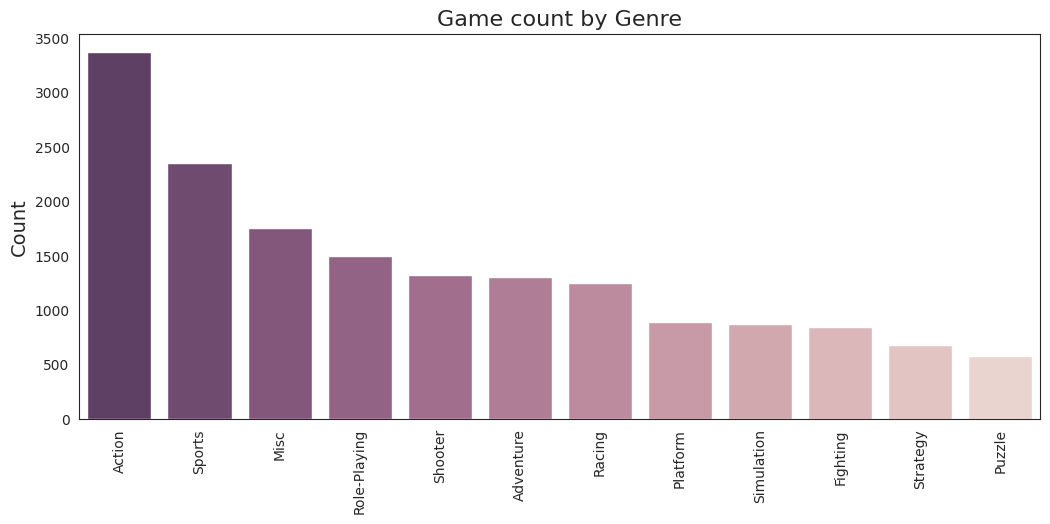

In [40]:
cols = ['Year_of_Release', 'Critic_Score', 'Publisher', 'Genre']

for col in cols:
    chart = df[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()
    plt.figure(figsize=(12.4, 5))
    plt.xticks(rotation=90)
    sns.barplot(x=col, y='Name', data=chart[:30], palette=sns.cubehelix_palette((12 if col == 'Genre' else 30), dark=0.3, light=.85, reverse=True)).set_title(('Game count by '+col), fontsize=16)
    plt.ylabel('Count', fontsize=14)
    plt.xlabel('')

In [53]:
def score_group(score):
    if score >= 4000:
        return '4000-5000'
    elif score >= 3000:
        return '3000-3999'
    elif score >= 2000:
        return '2000-2999'
    elif score >= 1000:
        return '1000-1999'
    else:
        return '0-999'

In [52]:
dfh = df.dropna(subset=['User_Count']).reset_index(drop=True)
dfh['Score_Group'] = dfh['User_Count'].apply(lambda x: score_group(x))

In [49]:
def in_top(x):
    if x in pack:
        return x
    else:
        pass
def width(x):
    if x == 'Platform':
        return 14.4
    elif x == 'Developer':
        return 13.2
    elif x == 'Publisher':
        return 11.3
    elif x == 'Genre':
        return 13.6

def height(x):
    if x == 'Genre':
        return 8
    else:
        return 9

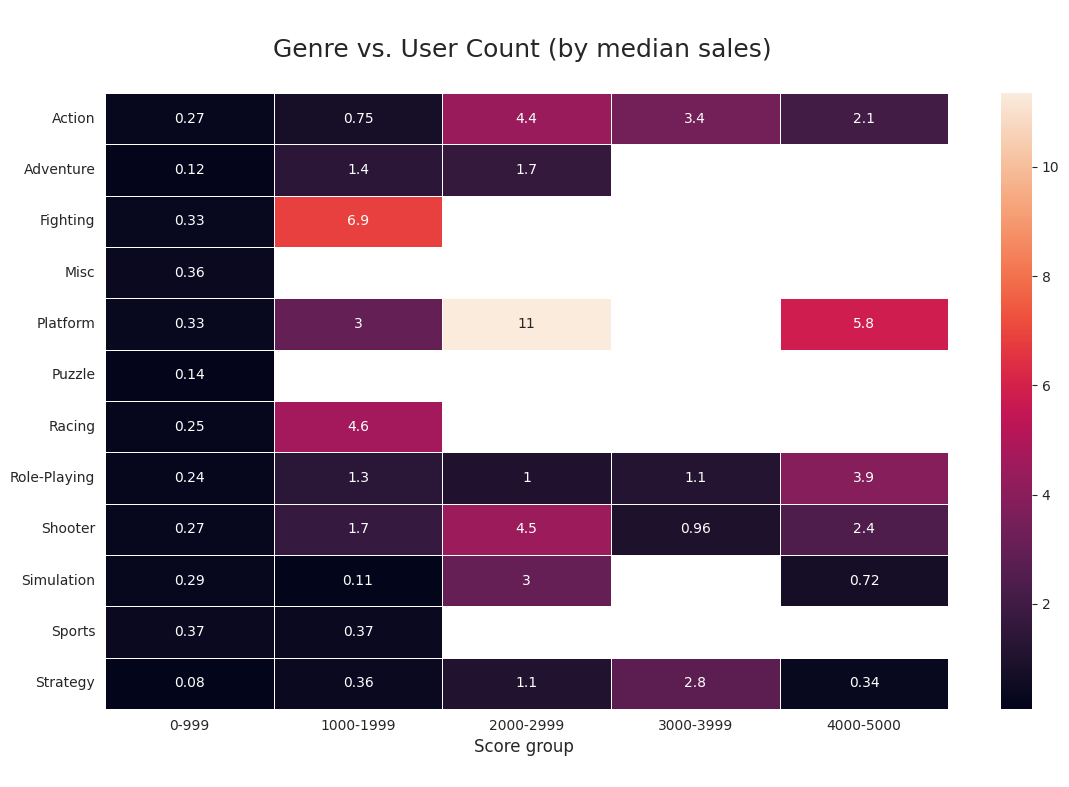

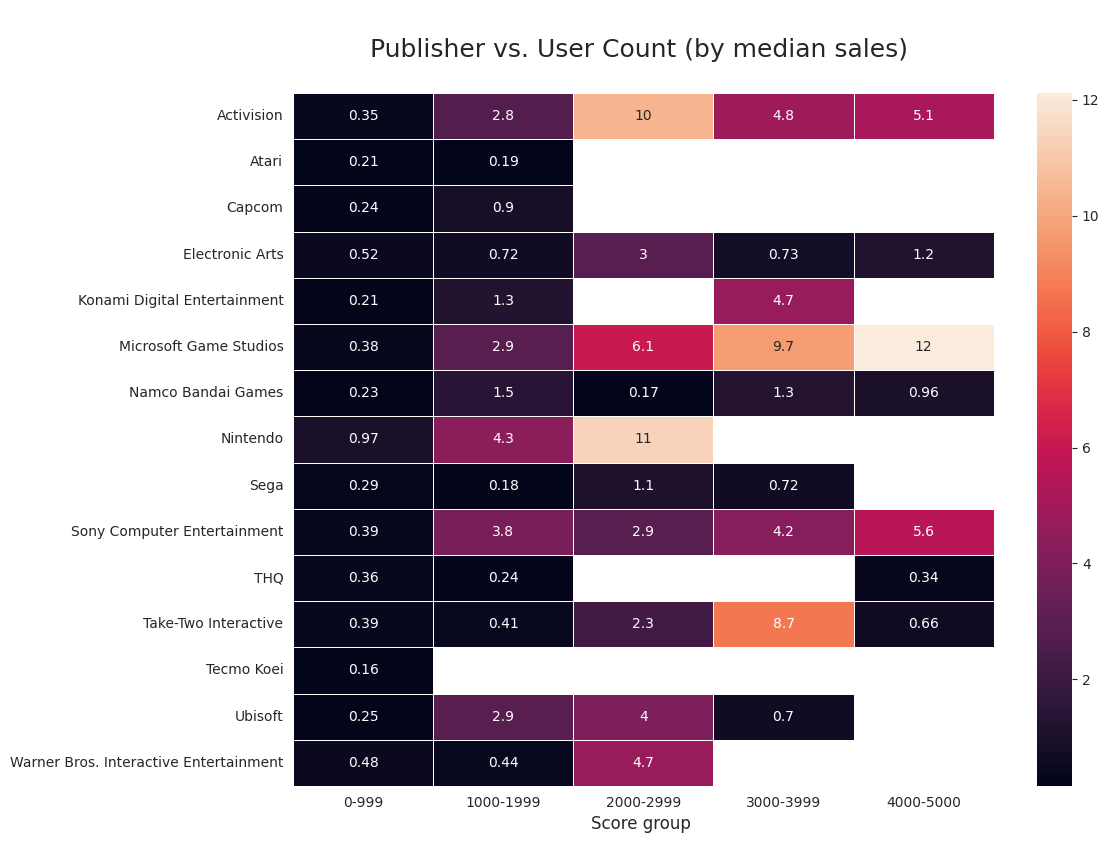

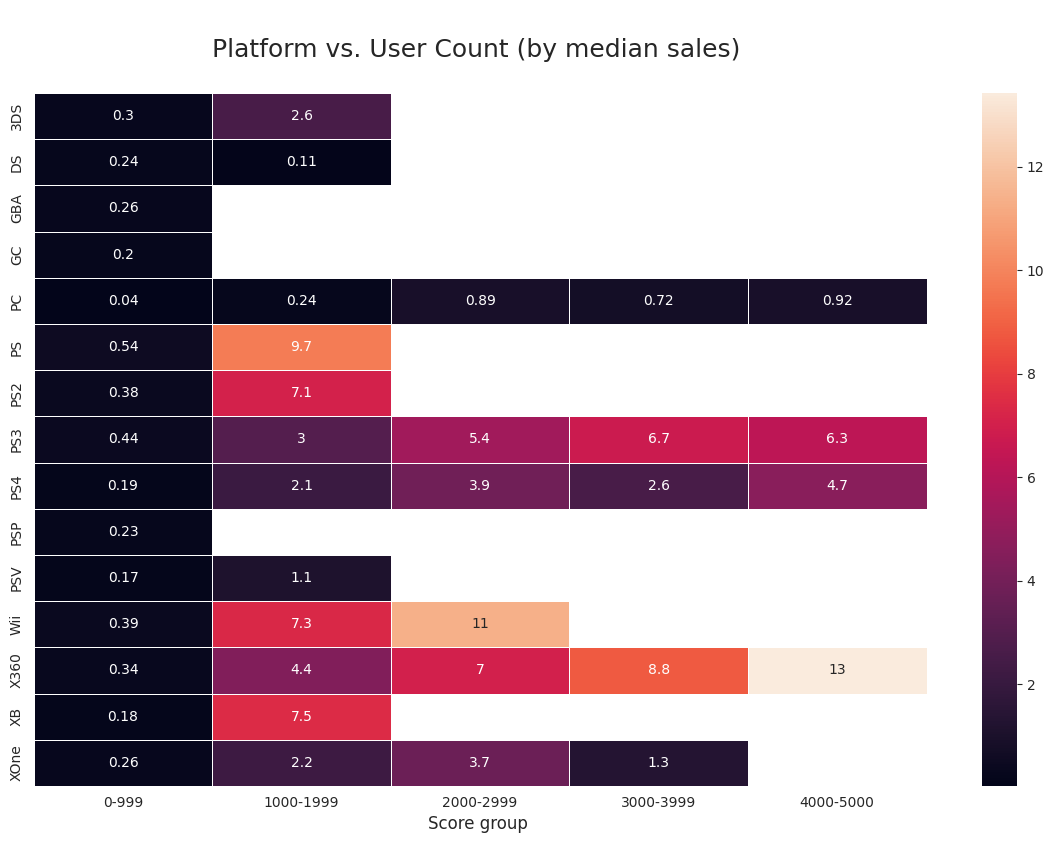

In [61]:
cols = ['Year_of_Release', 'Critic_Score', 'Genre', 'Publisher', 'Platform']
for col in cols:
    pack = []
    top = dfh[['Name', col]].groupby([col]).count().sort_values('Name', ascending=False).reset_index()[:15]
    for x in top[col]:
        pack.append(x)
    dfh[col] = dfh[col].apply(lambda x: in_top(x))
    dfh_platform = dfh[[col,'Score_Group', 'Global_Sales']].groupby([col,'Score_Group']).median().reset_index().pivot(index=col, columns="Score_Group", values="Global_Sales")
    w = width(col)
    h = height(col)
    if w is None or h is None:
        print(f"Warning: Skipping plot for {col} due to invalid width or height.")
        continue
    plt.figure(figsize=(w, h))
    sns.heatmap(dfh_platform, annot=True, fmt=".2g", linewidths=.5).set_title((' \n'+col+' vs. User Count (by median sales) \n'), fontsize=18)
    plt.ylabel('', fontsize=14)
    plt.xlabel('Score group \n', fontsize=12)
    pack = []